# EDA of House price dataset

## Importing all necessary libraries
let's import all the libraries necessary for EDA!

In [99]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the csv file in the project
Here we will read the csv file and drop the Id column as it is useless

In [100]:
data = pd.read_csv("train.csv")
data.drop(columns="Id",inplace = True)

## Understanding the data using .info and .describe
In this section we will understand the data using the .info and .describe method of pandas to find descriptive stats such as mean, std and quartiles.

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [102]:
print(data.describe())

        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

## Visualising the Target
Here we will use box plots to identify any outliers in the target.

61


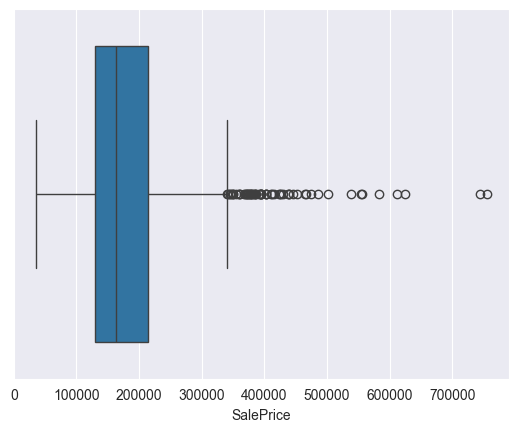

In [103]:
sns.boxplot(x=data["SalePrice"])
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['SalePrice'] < Q1 - 1.5*IQR) | (data['SalePrice'] > Q3 + 1.5*IQR)]
print(len(outliers))

Seems like there are 61 outliers in the target. dropping them would be bad as the model will then not learn to predict expensive houses. we can use log transform here to make the outliers less.

28


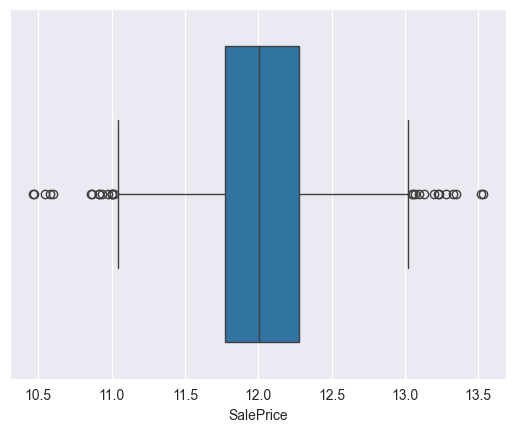

In [104]:
data["SalePrice"] = np.log1p(data["SalePrice"].to_numpy())
sns.boxplot(x=data["SalePrice"])
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['SalePrice'] < Q1 - 1.5*IQR) | (data['SalePrice'] > Q3 + 1.5*IQR)]
print(len(outliers))

seems like the amount of outliers have been reduced!

## Checking missing data
here we will find the percentage of NaN data in the features containing NaNs

In [105]:
cols_with_nan_bool = data.isna().any()
columns_with_nan = data.columns[cols_with_nan_bool].tolist()
NaN_percentage = data.loc[:,columns_with_nan].isna().mean()*100
NaN_percentage

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

## Handling missing data
In this section we will handle missing data for every feature using different techniques that are suitable for the feature.

### Handling missing values of the Alley feature
lets start with making boxplot of alley to see its relation with the target

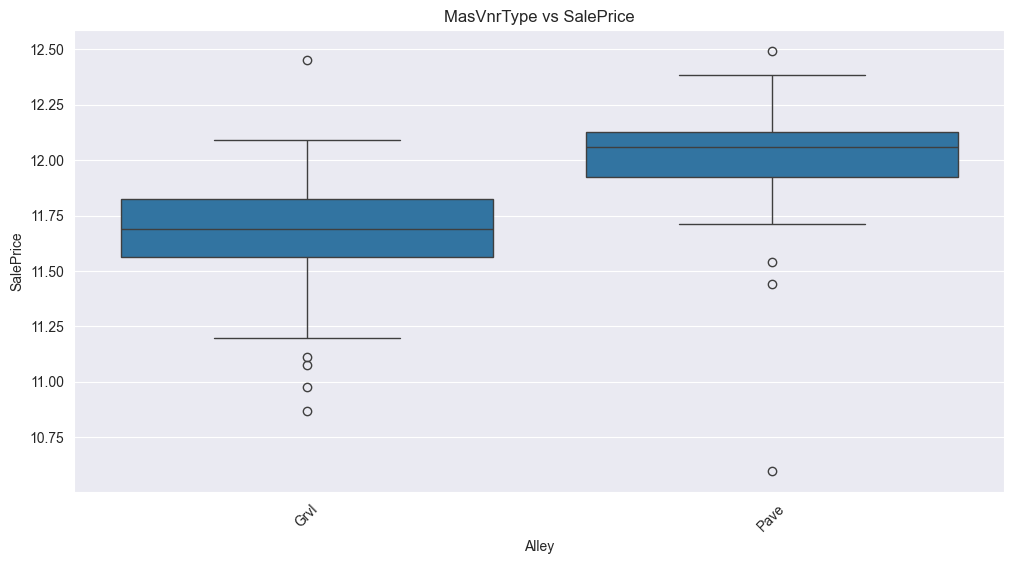

In [106]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data["Alley"], y=data["SalePrice"], data=data)
plt.xticks(rotation=45)  # rotate x labels if too long
plt.title("MasVnrType vs SalePrice")
plt.show()

seems like the target of label pave tends to be bigger than Grvl. Above that 93% data is missing. we can replace Nans with missing here so that the model understands that the data here is missing.

C:\Users\rohit\AppData\Local\Temp\ipykernel_10708\629667446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Alley"].fillna("Missing", inplace=True)


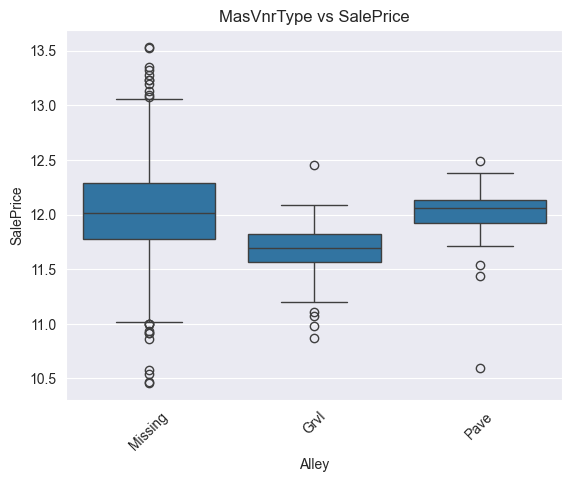

In [107]:
data["Alley"].fillna("Missing", inplace=True)
sns.boxplot(x=data["Alley"], y=data["SalePrice"], data=data)
plt.xticks(rotation=45)  # rotate x labels if too long
plt.title("MasVnrType vs SalePrice")
plt.show()

### Handling missing values of LotFrontage
here only 17% of data is missing. we can impute 0s here to show that the data is missing.

C:\Users\rohit\AppData\Local\Temp\ipykernel_10708\259609778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["LotFrontage"].fillna(data["LotFrontage"].dropna().median(), inplace=True)


<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

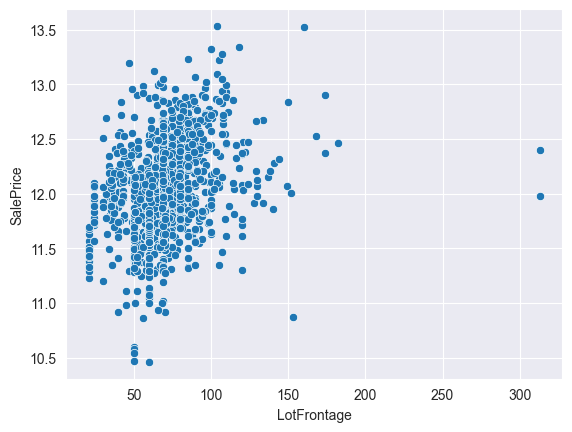

In [108]:
data["LotFrontage"].fillna(data["LotFrontage"].dropna().median(), inplace=True)
sns.scatterplot(x=data["LotFrontage"], y=data["SalePrice"], data=data)

now the data looks perfect!

### handling missing values of MasVnrType
as only about 50% of data is missing I can fill nans with missing label.

C:\Users\rohit\AppData\Local\Temp\ipykernel_10708\3916324905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["MasVnrType"].fillna("missing", inplace=True)


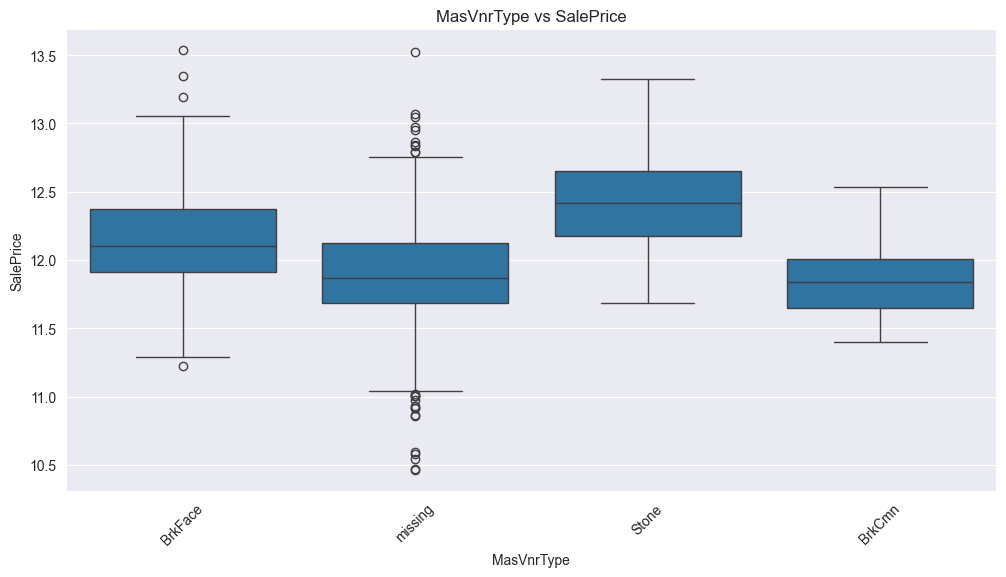

In [113]:
data["MasVnrType"].fillna("missing", inplace=True)
plt.figure(figsize=(12,6))
sns.boxplot(x=data["MasVnrType"], y=data["SalePrice"], data=data)
plt.xticks(rotation=45)  # rotate x labels if too long
plt.title("MasVnrType vs SalePrice")
plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_10708\2033648863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


<Axes: ylabel='None'>

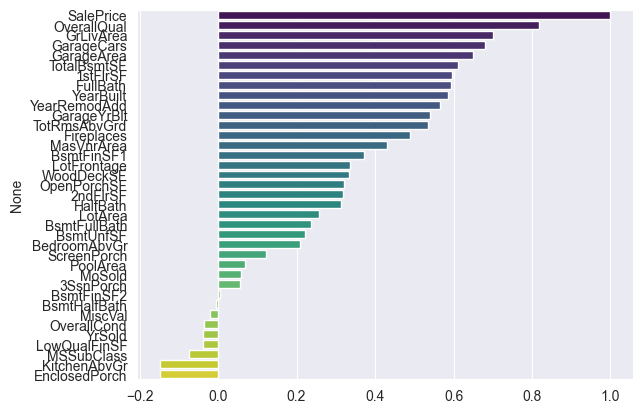

In [111]:
corr = data.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index, palette="viridis")

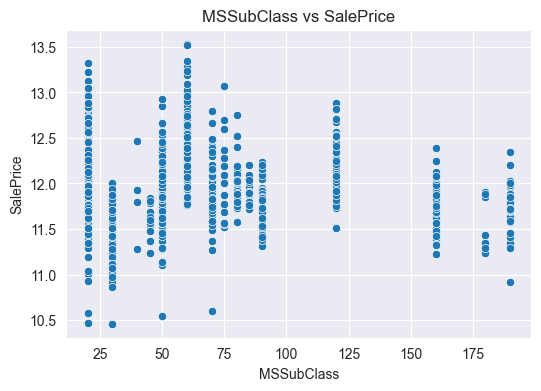

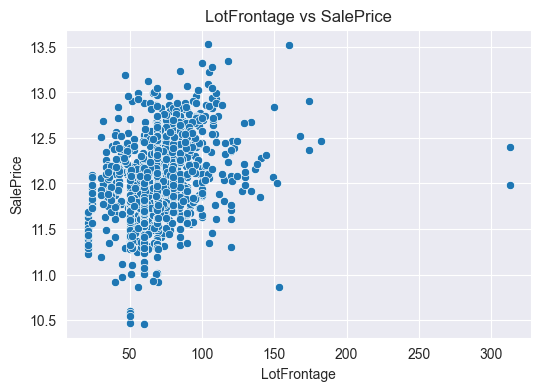

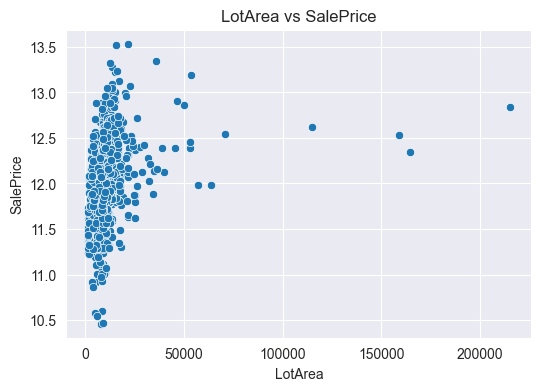

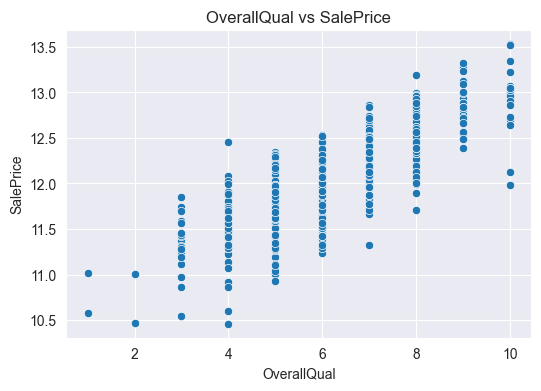

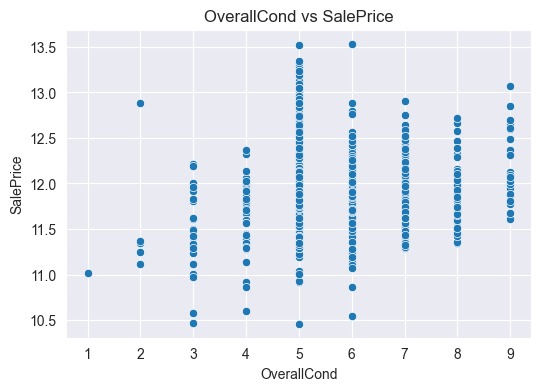

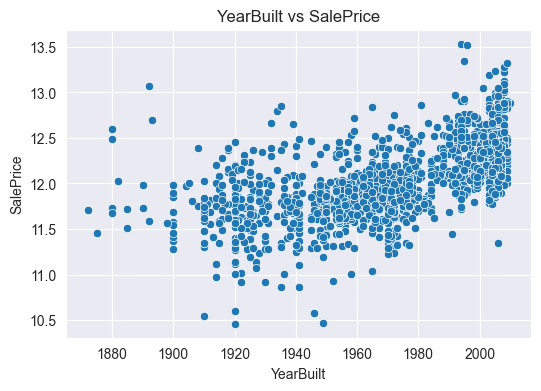

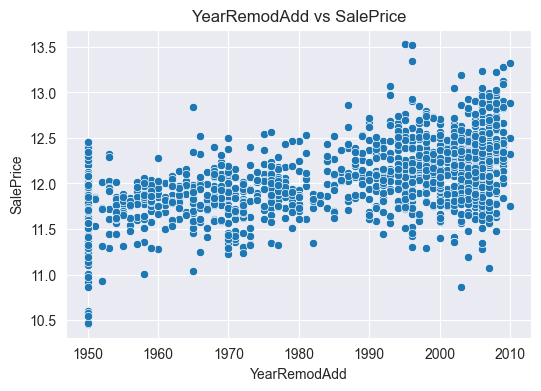

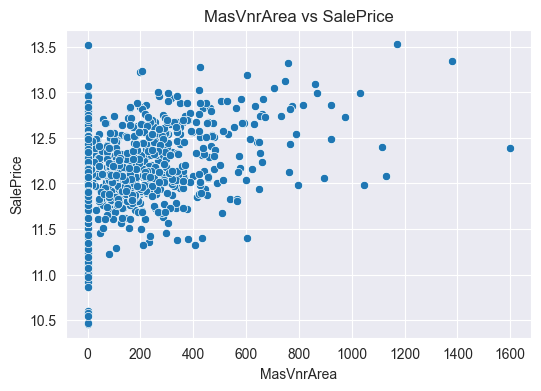

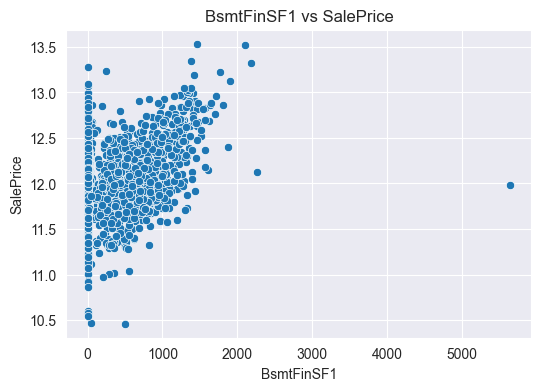

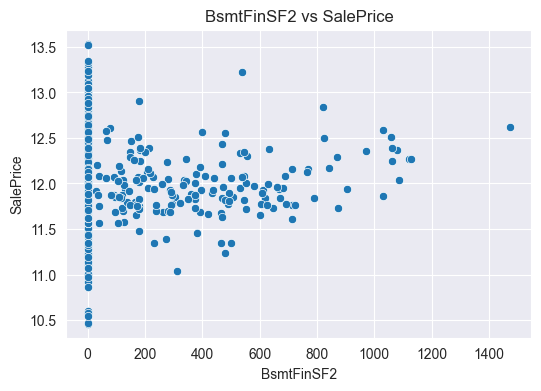

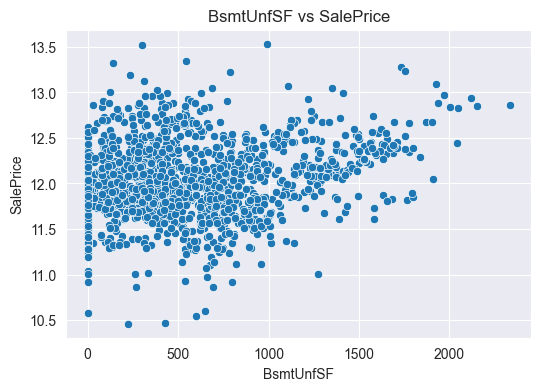

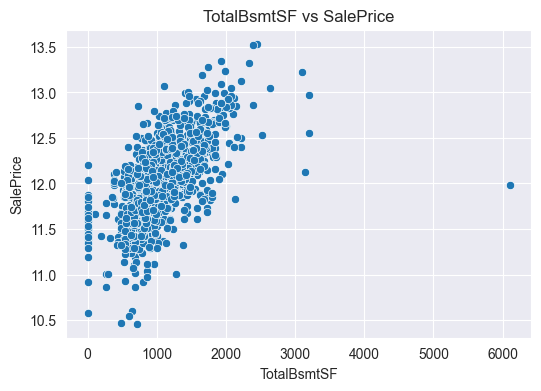

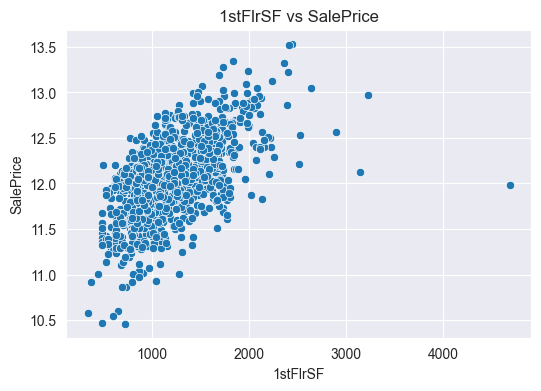

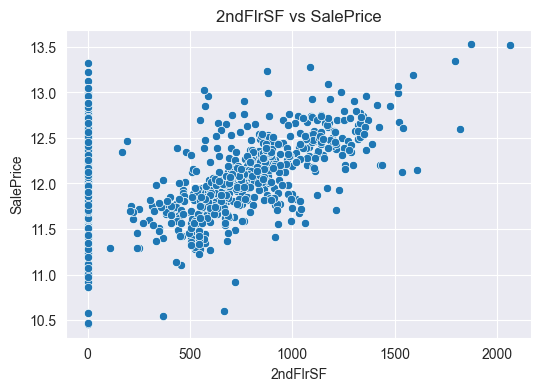

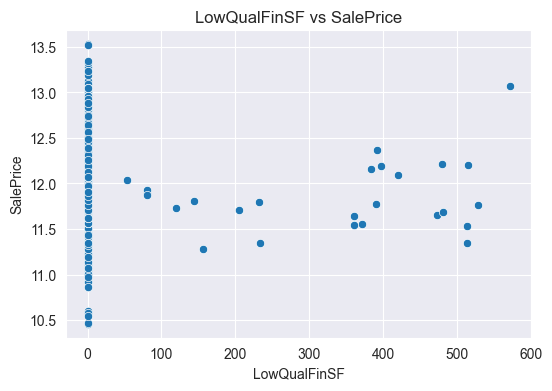

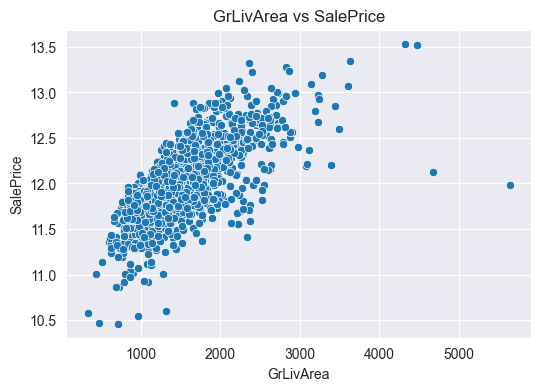

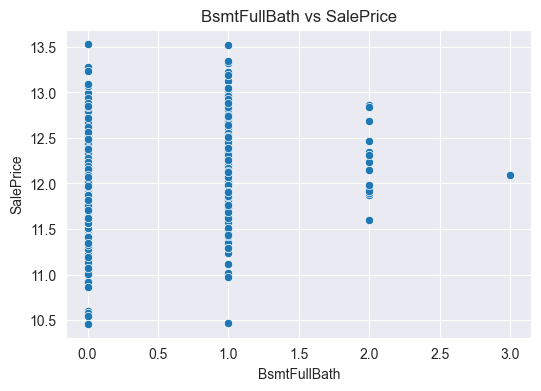

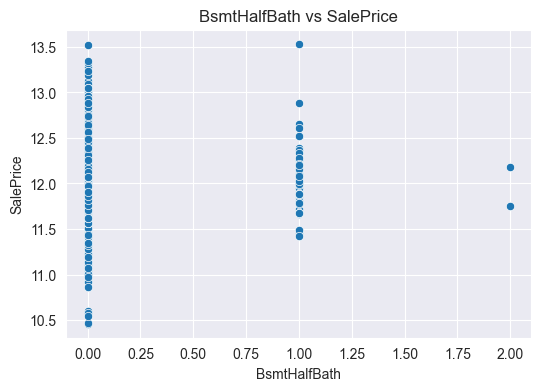

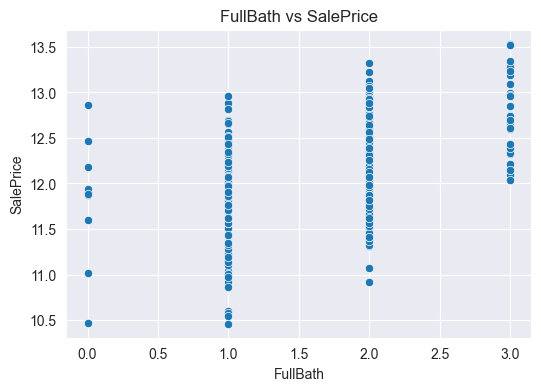

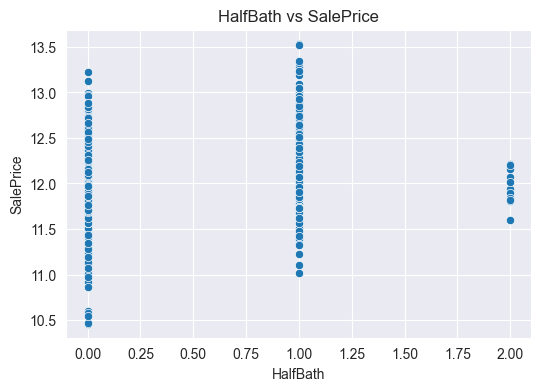

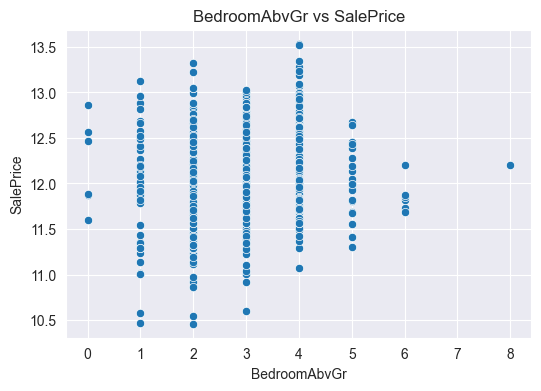

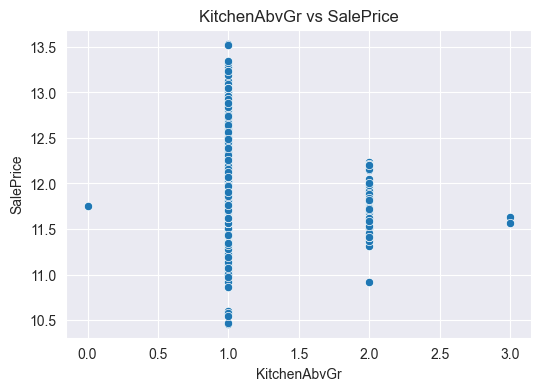

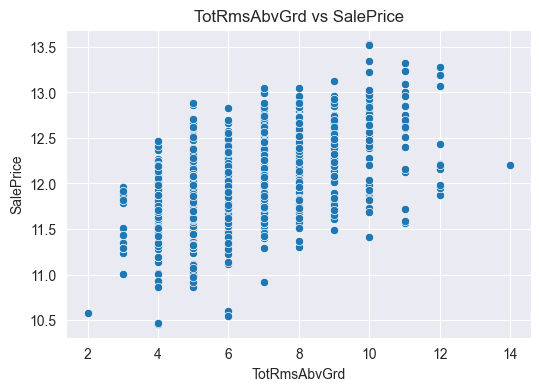

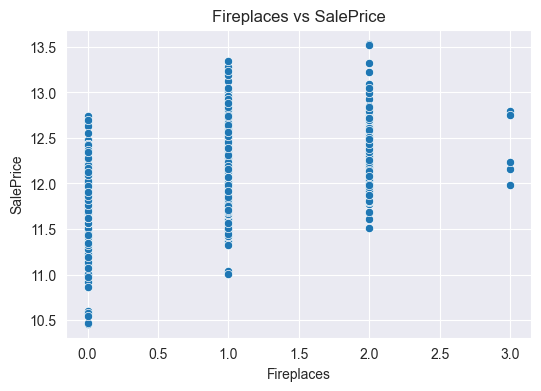

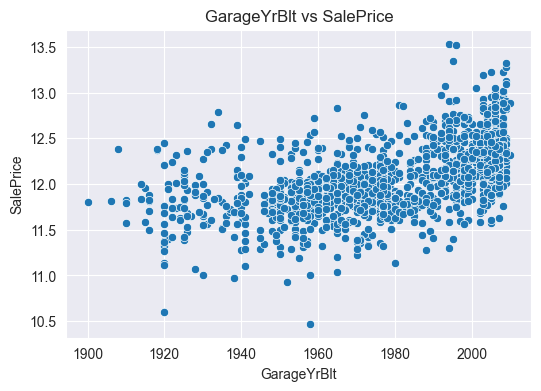

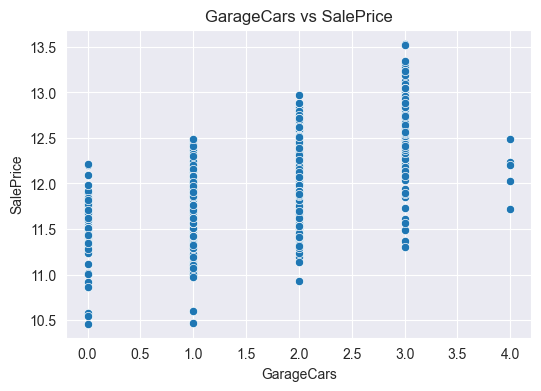

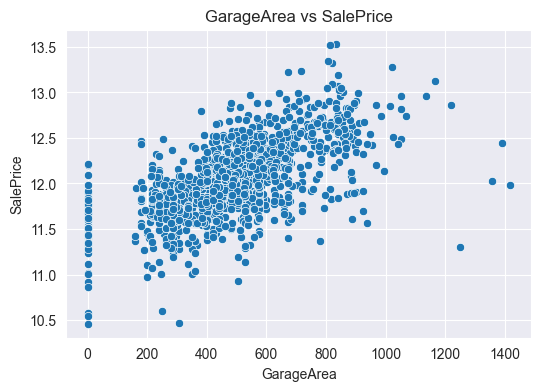

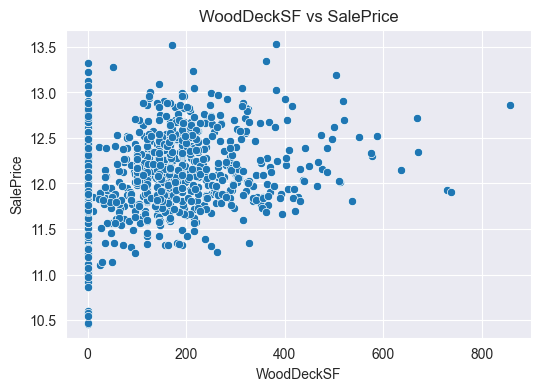

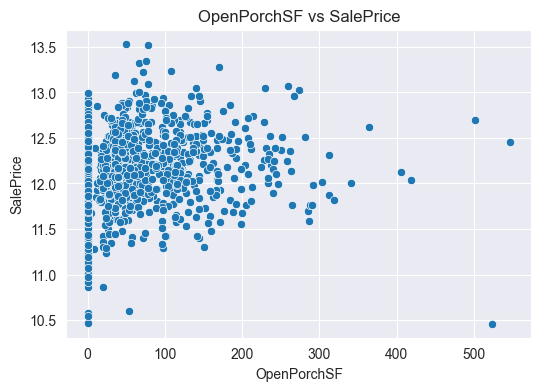

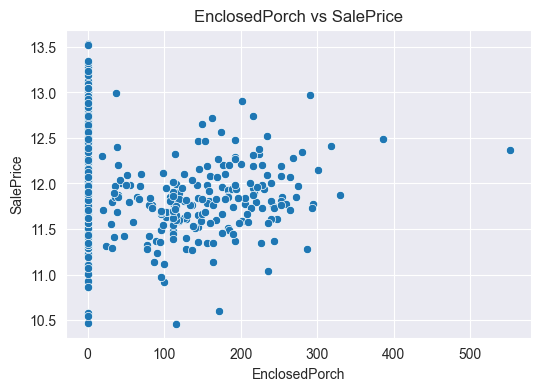

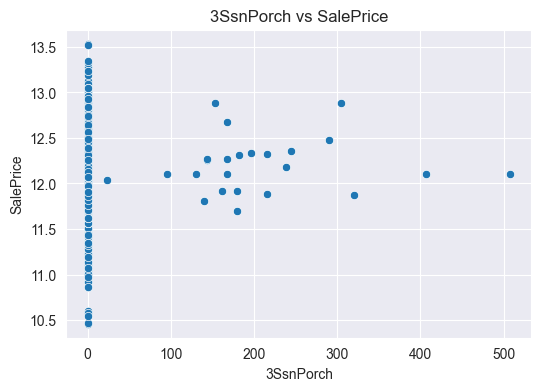

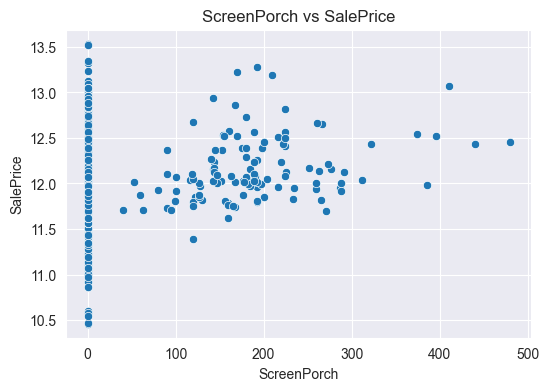

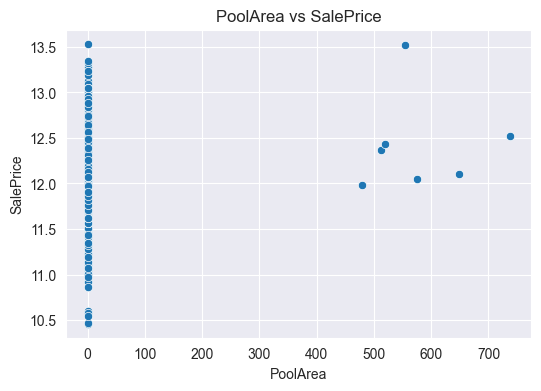

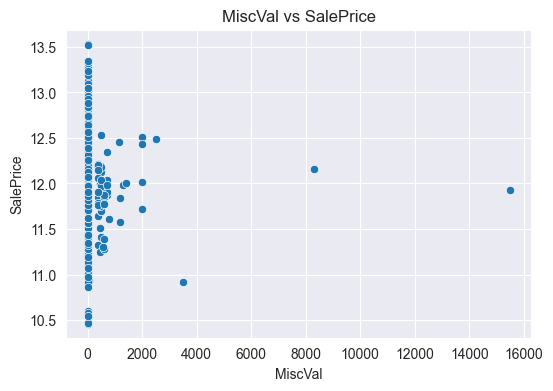

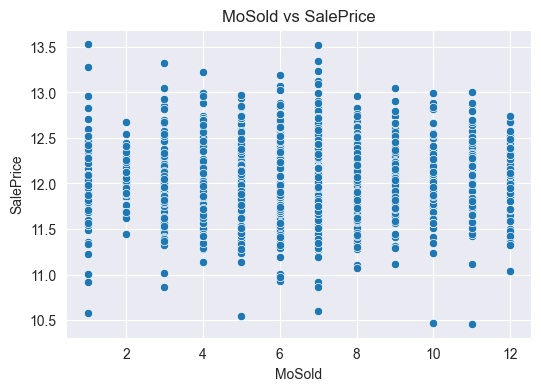

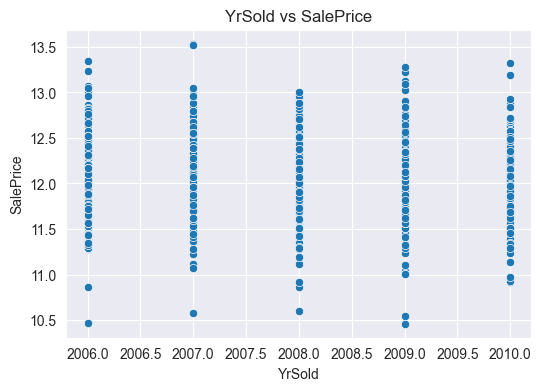

In [112]:
numeric = data.select_dtypes(include=['number'])
target = "SalePrice"

for col in numeric.columns:
    if col != target:  # skip plotting SalePrice against itself
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=data[col], y=data[target])
        plt.title(f"{col} vs {target}")
        plt.show()